In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S35_L226/Real_life_example_sklearn.csv")
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


In [3]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data.shape


(4345, 9)

### Drop Model as it is a descreat variable with  312 uique values. We dont need 312 dummies currently

In [5]:
data=data.drop(['Model'],axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


### Checking and removing null values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### Checking Prob. distribution and removing outliers(here extreme values occuring rarely)

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

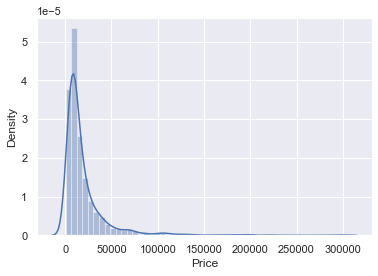

In [7]:
data_no_mv=data.dropna(axis=0)  #we can drop up to 5% of observations without any problem .....if we have a large dataset
sns.distplot(data_no_mv['Price'])  #plots probability distribution of specified column

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

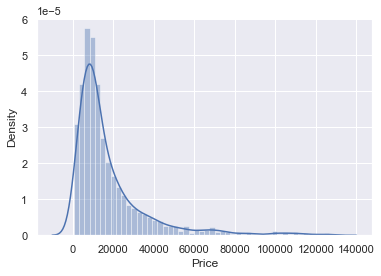

In [8]:
#removing last highest 1% of data from data
q=data_no_mv['Price'].quantile(0.99)
data1=data_no_mv[data_no_mv['Price']<q]
sns.distplot(data1['Price'])

##### Similarly we can check for mileage and engine variant

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

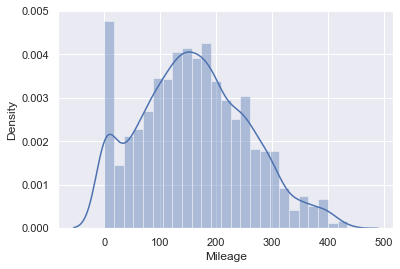

In [9]:
q=data1['Mileage'].quantile(0.99)
data2=data1[data1['Mileage']<q]
sns.distplot(data2['Mileage'])


C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

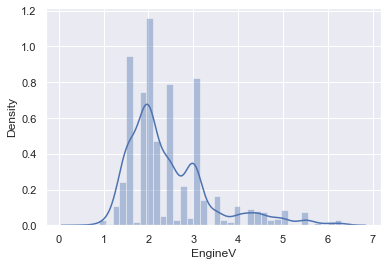

In [10]:
#most engine ranges are b/w 0-6.5 so we will only consider in that range and others will be outliers

data3=data2[data2['EngineV']<6.5]
sns.distplot(data3['EngineV'])


###### upon  removal of outliers in  price,mileage,engine V

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

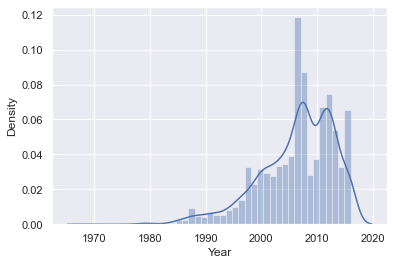

In [11]:
#Last remaninig feature is year....
sns.distplot(data_no_mv['Year'])

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

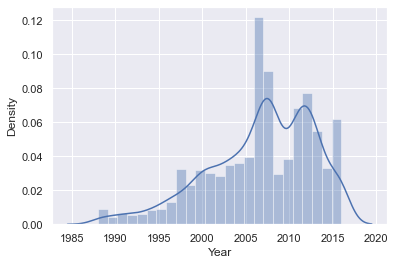

In [12]:
#in above graph we see outlier in lower end ...that is some card are really old so remove them i.e. first 1%
q=data3['Year'].quantile(0.01)
data4=data3[data3['Year']>q]
sns.distplot(data4['Year'])

###### Finally we have a cleared data frame

In [13]:
data_cleared=data4
data_cleared.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013


In [14]:
# we need to reset the index value as many rows are dropped in the process
data_cleared=data_cleared.reset_index(drop=True)
data_cleared.tail() #can compare with above output

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
3866,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013


In [15]:
data_cleared.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking OLS Assumptions
##### 1.) linearity
##### 2.) no endogenity
##### 3.) normality and homoscedasticity
##### 4.) no autocorrelation (b/w errors)
##### 5.) no multicolinearity


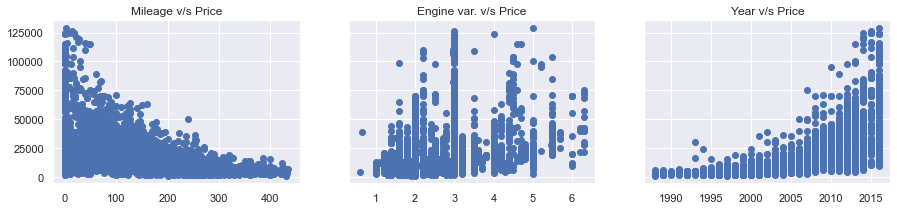

In [16]:
# 1.)Linearity (confirming linear relationssip of target with each feature)
f, (graph1,graph2,graph3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
graph1.scatter(data_cleared['Mileage'],data_cleared['Price'])
graph1.set_title('Mileage v/s Price')
graph2.scatter(data_cleared['EngineV'],data_cleared['Price'])
graph2.set_title('Engine var. v/s Price')
graph3.scatter(data_cleared['Year'],data_cleared['Price'])
graph3.set_title('Year v/s Price')
plt.show()


Price needs transformation 
#### Use log() transformation here as relation is mostly exponential with all three

In [17]:
data_cleared['log_price']=np.log(data_cleared['Price'])
data_cleared

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


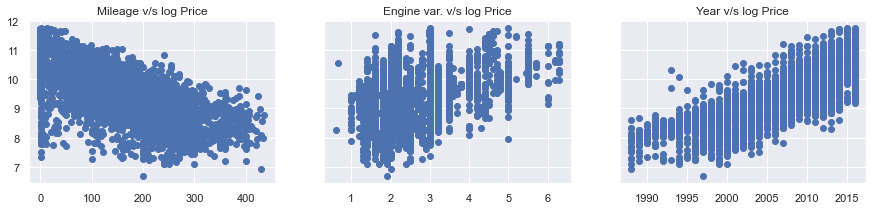

In [18]:
f, (graph1,graph2,graph3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
graph1.scatter(data_cleared['Mileage'],data_cleared['log_price'])
graph1.set_title('Mileage v/s log Price')
graph2.scatter(data_cleared['EngineV'],data_cleared['log_price'])
graph2.set_title('Engine var. v/s log Price')
graph3.scatter(data_cleared['Year'],data_cleared['log_price'])
graph3.set_title('Year v/s log Price')
plt.show()

In [19]:
data_cleared=data_cleared.drop(['Price'],axis=1)
data_cleared

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


#### No endogenity => There are many test..but for now we can check each feature's correlation with error terms
#### but it can be done after prediction...we can plot graph for that purpose
#### ----
#### Normality => Is assumed with application of CLT & in output the error terms will be normaly distributed due to "intercept"
#### Homoscedasticity => "Hetroscedasticity" can be removed using log() trans. which we have done and now its Homoscedasticity
#### ----
#### No Autocorelation b/w errors => In this data set we have independent observations each comming from different customer
#### So we won't have the problem of autocorrelation

### Check Multicollinearity (linearity b/w features i.e. independant variables)
##### There is a method provided by statsmodels named variance_inflation_factor => it takes all the variables and provide float values as output
##### VIF=1 : no multicollinearity       1< VIF < 5  :  perfectly okay (means we can accept the var.)
##### But as there is no fixed norm   1< VIF < 10 : okay ... is also considered ....including this lecture

In [20]:
data_cleared.columns.values
#from below variables we are only going to use continuous ones i.e. Mileage,EngineV,Year 
#rest are categorical which are yet to be taught

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [21]:
#if multicollinearity is present we need to remove it

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleared[['Year','Mileage','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i)for i in range (variables.shape[1])]
#above for loop is used to calculate VIF for 3 times for all 3 variables as here variables.shape[1]=3 i.e. dimensonality
vif['features']=variables.columns
vif

,VIF,features
0,10.354854,Year
1,3.791584,Mileage
2,7.662068,EngineV


In [22]:
#clearification of above loop ...."variance_inflation_factor" takes 2 arguments a array of values and index no. 
#i.e. why as we have 3arrays in list "variables" we will repeat it for 3 times using for loop
varis=data_cleared[['Year','Mileage']]   
#VIF for i=0 i.e. log_price
variance_inflation_factor(varis.values,0)

3.791088787991874

##### Remove Year from data set as 1< VIF <10 acceptable but VIF(Year)>10

In [23]:
data_no_multicollinearity=data_cleared.drop(['Year'],axis=1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Creating Dummies

In [24]:
data_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


##### Rearranging the Target variable in front

In [25]:
data_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [26]:
col=['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']
data_preprocessed=data_dummies[col]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Now Creating the Regression

### Desclaring and scaling the variables

In [27]:
target=data_preprocessed["log_price"]
features=data_preprocessed.drop('log_price',axis=1)
features

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features)
# scaling the feature / input variables
# although we are scaling the dummies as well which is not practised commonly as they lose all the meaning
features_scaled=scaler.transform(features)
features_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(features_scaled,target,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3093, 17), (774, 17), (3093,), (774,))

### Fitting The Linear Regresion Model

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
# the above model is log Linear regression model.....as we initially transforem the data using log transformation

LinearRegression()

##### Now Comparing results using training data i.e. using x_train to predict and comparing result to y_train

In [31]:
yhat_train=reg.predict(x_train)
yhat_train


array([ 9.50514864,  8.43988534,  8.9814371 , ...,  9.89084407,
        8.83275645, 10.1311128 ])

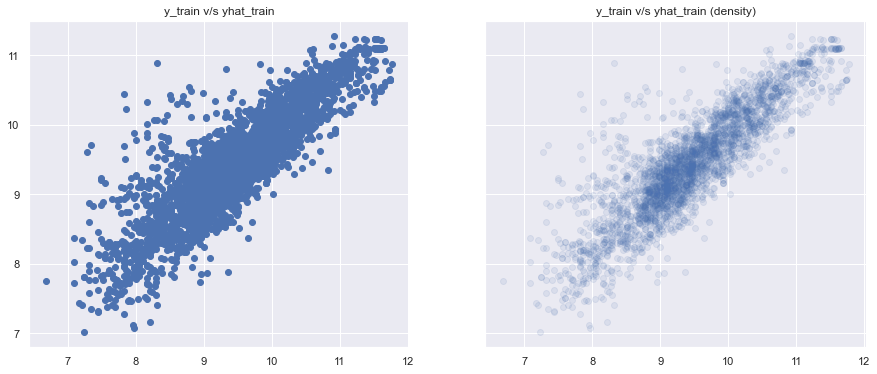

In [32]:
f,(g1,g2)=plt.subplots(1,2,sharey=True,figsize=(15,6))
g1.scatter(y_train,yhat_train)
g2.scatter(y_train,yhat_train,alpha=0.1)
g1.set_title('y_train v/s yhat_train')
g2.set_title('y_train v/s yhat_train (density)')
plt.show()

##### We can also se the prob. distribution of difference b/w "y_train - yhat_train"

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'for few values y_train-yhat_train is way higher ...means our model is over estimeting the price')

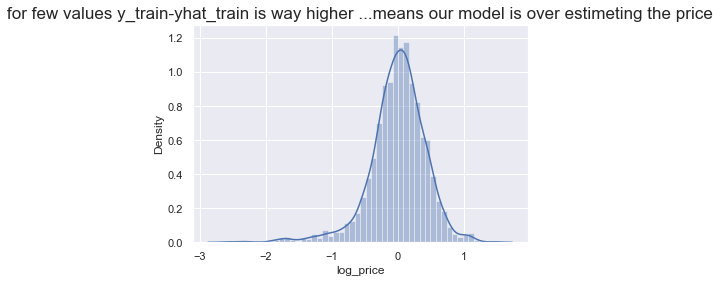

In [33]:
sns.distplot(y_train-yhat_train)
plt.title('for few values y_train-yhat_train is way higher ...means our model is over estimeting the price',size=17)
# on seeing the result we can say that error is noramlly distributed

### Finding weights

In [34]:
reg.intercept_


9.421003614148074

In [35]:
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [36]:
# creating a data frame for weights
reg_summary=pd.DataFrame(data=features.columns,columns=['Features'])
reg_summary['weights']=reg.coef_
print(''' => "NOTE"--> We can not compare the weights of dummies with other variables weights.So for dummies we need to compare them with the benchmark  of dropped variable wich is =0.''','\n',
      '''=> On other side the way to compare the non-dummies is like "Mileage" is -ve so if it increases the "price" decreases and for "engine variant" its directly proportional.''','\n',
      '''=> Also for dummies comparison "BMW" has +ve weight means for audi with benchmark "0" BMW with weight ">0" shows it is more costly than an "AUDI". Similarly Renault has weight in -ve i.e. "<0" showing that a renault is cheaper than "AUDI" ''' )
reg_summary

 => "NOTE"--> We can not compare the weights of dummies with other variables weights.So for dummies we need to compare them with the benchmark  of dropped variable wich is =0. 
 => On other side the way to compare the non-dummies is like "Mileage" is -ve so if it increases the "price" decreases and for "engine variant" its directly proportional. 
 => Also for dummies comparison "BMW" has +ve weight means for audi with benchmark "0" BMW with weight ">0" shows it is more costly than an "AUDI". Similarly Renault has weight in -ve i.e. "<0" showing that a renault is cheaper than "AUDI" 


,Features,weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


# Testing

In [37]:
yhat_test=reg.predict(x_test)
yhat_test

array([10.60706289,  8.98179425,  8.65822119,  9.18664285,  8.85756692,
        9.71637315,  9.79883792,  9.00579793, 10.6198872 , 11.2775366 ,
        8.3247193 , 10.03241973,  7.92991789,  8.23267579,  8.81274747,
        7.66808853,  9.41385597,  7.77949791,  8.92171696,  9.27524226,
        9.40253716,  8.8379726 , 10.18256914,  8.6740598 ,  9.78670846,
        8.18550512,  9.40052453,  9.21652932,  7.74225004, 11.01570396,
        8.97596106,  9.26905144,  9.95580767,  9.82110077,  9.79990251,
        7.86759626,  8.56697285,  9.14641792,  8.54607966,  8.65865636,
        9.69037878,  9.04282052,  9.53085237,  8.91887072, 10.31610525,
       10.52682563,  9.55556626,  9.16259755,  9.19870862,  9.52004341,
        8.79054574,  9.0281696 ,  9.14947668,  9.81329793,  9.92315732,
        9.6110507 ,  9.76772135, 10.1537154 ,  9.38546163,  8.32919402,
       10.68075215,  8.84286856, 10.47763519,  8.73973326,  7.87020936,
        9.86026844,  7.93884517,  7.77016539, 10.19112139,  9.50

#### Ploting y_test v/s yhat_test

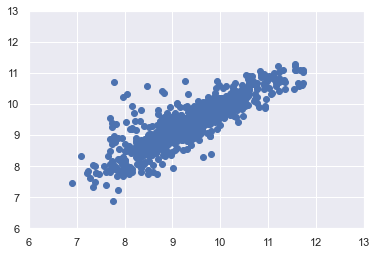

In [38]:
plt.scatter(y_test,yhat_test)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

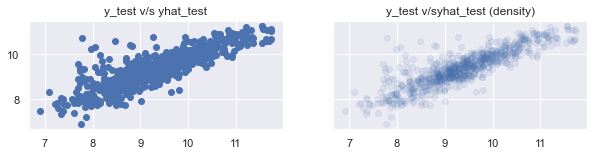

In [39]:
f,(g1,g2)=plt.subplots(1,2,sharey=True,figsize=(10,2))
g1.scatter(y_test,yhat_test)
g2.scatter(y_test,yhat_test,alpha=0.1)
g1.set_title('y_test v/s yhat_test')
g2.set_title('y_test v/syhat_test (density)')
plt.show()

In [40]:
cmp_df=pd.DataFrame(np.exp(yhat_test),columns=['y_test_predicted'])
cmp_df['y_test']=np.exp(y_test)
print('We need to drop the previously stored index for y_test')
cmp_df

We need to drop the previously stored index for y_test


,y_test_predicted,y_test
0,40419.308971,4200.0
1,7956.895960,NaN
2,5757.284408,NaN
3,9765.810605,NaN
4,7027.363814,NaN
...,...,...
769,4699.586013,NaN
770,9123.067372,NaN
771,6267.803094,NaN
772,20906.128600,NaN


In [41]:
y_test=y_test.reset_index(drop=True)
cmp_df['y_test']=np.exp(y_test)

cmp_df

,y_test_predicted,y_test
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


#### Adding residual and % residual columns for better inference

In [42]:
cmp_df['Residual']=cmp_df['y_test']-cmp_df['y_test_predicted']
cmp_df['Residual%']=np.absolute(cmp_df['Residual'])/cmp_df['y_test']*100
cmp_df

,y_test_predicted,y_test,Residual,Residual%
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [43]:
cmp_df.describe()


,y_test_predicted,y_test,Residual,Residual%
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525


In [44]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x: '%.2f' % x)
cmp_df.sort_values(by=['Residual%'])

,y_test_predicted,y_test,Residual,Residual%
387,13602.75,13600.00,-2.75,0.02
74,28889.06,28900.00,10.94,0.04
314,35530.21,35500.00,-30.21,0.09
336,11313.27,11300.00,-13.27,0.12
425,2995.68,3000.00,4.32,0.14
262,52180.11,52055.25,-124.86,0.24
674,3107.51,3100.00,-7.51,0.24
648,9675.57,9700.00,24.43,0.25
79,21407.59,21335.00,-72.59,0.34
313,9865.72,9900.00,34.28,0.35


### In below data we can see that for some part of presictions the predicted price is way higher than the observed price ..
### It may be because of some factors which we did not included 
### And also some other factor like damage which can lower the price significantly resulting in higher predicted price

In [45]:
cmp_df.sort_values(by=['Residual%']).tail(30)

,y_test_predicted,y_test,Residual,Residual%
161,7319.10,2800.00,-4519.10,161.40
465,6544.84,2450.00,-4094.84,167.14
249,6152.48,2300.00,-3852.48,167.50
272,16171.29,6000.00,-10171.29,169.52
528,30472.10,11299.00,-19173.10,169.69
513,7290.89,2600.00,-4690.89,180.42
669,9818.75,3500.00,-6318.75,180.54
163,10134.87,3500.00,-6634.87,189.57
636,9795.81,3350.00,-6445.81,192.41
691,18200.62,6000.00,-12200.62,203.34
